In [2]:
# Generalimports
import numpy as np
import torch

# DeepMoD functions

from deepymod import DeepMoD
from deepymod.model.func_approx import NN, Siren
from deepymod.model.constraint import LeastSquares
from deepymod.model.sparse_estimators import Threshold,PDEFIND
from deepymod.training import train
from deepymod.training.sparsity_scheduler import TrainTestPeriodic
from deepymod.analysis import load_tensorboard
from scipy.io import loadmat

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Settings for reproducibility
np.random.seed(40)
torch.manual_seed(0)


%load_ext autoreload
%autoreload 2


In [40]:
df = load_tensorboard('runs/noise_20_random/x_11')

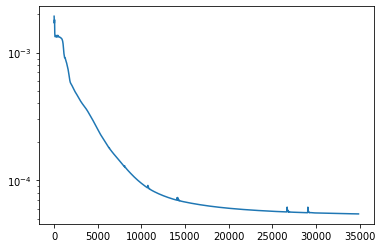

In [43]:
plt.semilogy(df['loss_loss'])

In [42]:
df['coeffs_output_0_coeff_0'].head(50)

0       -0.431136
25       1.580624
50      32.032360
75      -0.047945
100     -1.698518
125      2.330791
150     -0.867089
175     -0.750472
200     -1.293237
225      6.767292
250      8.599845
275      7.466794
300      2.196339
325      5.728551
350     -0.024487
375     -0.454255
400     -3.626989
425      1.364663
450      4.329220
475      0.000000
500      0.000000
525     -0.739113
550     -0.726410
575     -0.254847
600      1.535623
625      4.330784
650      2.213814
675      1.450024
700      1.960318
725      1.571424
750      1.742850
775      3.366663
800      2.952027
825      2.716758
850      2.490294
875      1.717470
900      1.439711
925      1.603853
950      1.300423
975      0.538496
1000     0.465625
1025     0.481910
1050     0.245081
1075     0.238465
1100     0.176458
1125     0.100182
1150     0.018627
1175     0.000000
1200     0.000000
1225     0.000000
Name: coeffs_output_0_coeff_0, dtype: float64

In [37]:
df['estimator_coeffs_output_0_coeff_0'].head(50)

0      -0.799685
25      0.000000
50     -0.902402
75     -0.943624
100     0.325511
125     1.285759
150    -0.548986
175    -0.606971
200    -0.254272
225     0.574782
250     0.988048
275     0.895042
300     1.284768
325     0.000000
350     0.728284
375     4.421722
400     4.530536
425     4.096965
450     7.304808
475     8.257999
500     7.050510
525     7.636446
550     6.253699
575     5.919086
600     5.313379
625     5.364046
650     4.072596
675     2.757953
700     2.115307
725     1.610267
750     0.896908
775     0.548508
800     0.337379
825     0.129688
850     0.094415
875     0.079097
900     0.106591
925     0.108006
950     0.119162
975     0.072050
1000    0.000000
1025    0.000000
1050   -0.075858
1075   -0.076879
1100   -0.065997
1125   -0.053512
1150   -0.053181
1175    0.000000
1200    0.000000
1225    0.000000
Name: estimator_coeffs_output_0_coeff_0, dtype: float64

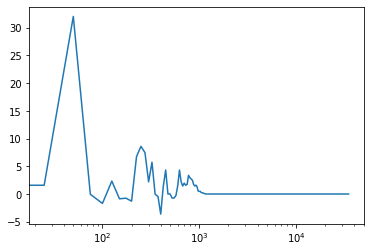

In [25]:
plt.semilogx(df['coeffs_output_0_coeff_0'])


(100, 20000)

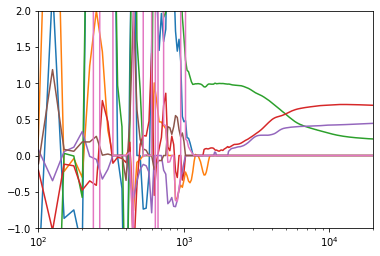

In [23]:
plt.semilogx(df['coeffs_output_0_coeff_0'])
plt.semilogx(df['coeffs_output_0_coeff_1'])
plt.semilogx(df['coeffs_output_0_coeff_2'])
plt.semilogx(df['coeffs_output_0_coeff_3'])
plt.semilogx(df['coeffs_output_0_coeff_4'])
plt.semilogx(df['coeffs_output_0_coeff_5'])
plt.semilogx(df['coeffs_output_0_coeff_6'])
plt.ylim([-1,2])
plt.xlim([100,20000])

In [37]:
df[df['estimator_coeffs_output_0_coeff_0']<0.000001]['coeffs_output_0_coeff_'+str(0)]

25      -0.733020
50       0.356527
125     -0.168961
150     -0.324764
175     -0.326644
           ...   
18000    0.000000
18025    0.000000
18050    0.000000
18075    0.000000
18100    0.000000
Name: coeffs_output_0_coeff_0, Length: 722, dtype: float64

In [33]:
xi = np.array([df[df['estimator_coeffs_output_0_coeff_1']==0]['coeffs_output_0_coeff_'+str(i)].iloc[0] for i in np.arange(0,12)])


In [34]:
xi

array([ 0.35652745, -1.08398628, -1.39453781,  1.7679441 ,  2.61563349,
        5.15016603,  0.93987882, -0.93987548, -3.12658954, -2.97117281,
       -0.57018113, -0.10042834])